# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

### Assignments 1: 
#### Find `Most Common Words` and create word cloud.

#### Read in the document-term matrix

In [17]:
import pandas as pd

data=pd.read_pickle('dtm.pkl')
data=data.transpose()
data

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
zombie,1,0,1,0,0,0,0,0,0,0,0,0
zombies,0,0,1,0,0,0,0,0,0,0,0,0
zoning,0,0,1,0,0,0,0,0,0,0,0,0
zoo,0,0,0,0,0,0,0,0,0,0,0,1


#### Find  and print the top 30 words said by each comedian


In [18]:
top_dict={}
for comedian in data.columns:
    top=data[comedian].sort_values(ascending=False).head(30)
    # print(top)
    top_dict[comedian]=list(zip(top.index,top.values))
top_dict

{'ali': [('like', 126),
  ('im', 74),
  ('know', 65),
  ('just', 64),
  ('dont', 61),
  ('shit', 34),
  ('thats', 34),
  ('youre', 31),
  ('gonna', 28),
  ('ok', 26),
  ('lot', 24),
  ('oh', 21),
  ('wanna', 21),
  ('gotta', 21),
  ('husband', 20),
  ('right', 19),
  ('time', 19),
  ('got', 19),
  ('cause', 18),
  ('women', 17),
  ('day', 17),
  ('people', 16),
  ('pregnant', 15),
  ('hes', 14),
  ('need', 14),
  ('god', 14),
  ('tell', 13),
  ('yeah', 13),
  ('work', 12),
  ('really', 12)],
 'anthony': [('im', 60),
  ('like', 50),
  ('know', 39),
  ('dont', 38),
  ('joke', 34),
  ('got', 34),
  ('said', 31),
  ('thats', 31),
  ('anthony', 27),
  ('just', 26),
  ('day', 26),
  ('say', 26),
  ('guys', 23),
  ('people', 22),
  ('youre', 19),
  ('tell', 19),
  ('grandma', 18),
  ('right', 18),
  ('thing', 17),
  ('think', 17),
  ('time', 17),
  ('good', 16),
  ('jokes', 16),
  ('school', 16),
  ('yeah', 16),
  ('did', 16),
  ('gonna', 15),
  ('okay', 15),
  ('baby', 15),
  ('ive', 15)],
 

#### By looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that. Look at the most common top words and add them to the stop word list.



In [19]:
# print(top_dict.items())
for comedian, top_words in top_dict.items():
    print(comedian)
    # print(top_words)
    print(', '.join([word for word ,count in top_words[0:14]]))
    print('----')


ali
like, im, know, just, dont, shit, thats, youre, gonna, ok, lot, oh, wanna, gotta
----
anthony
im, like, know, dont, joke, got, said, thats, anthony, just, day, say, guys, people
----
bill
like, just, right, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats, dude
----
bo
know, like, im, think, love, just, bo, stuff, repeat, dont, yeah, want, right, cos
----
dave
like, know, said, just, im, shit, people, didnt, dont, ahah, time, fuck, thats, fucking
----
hasan
like, im, know, dont, dad, youre, just, going, thats, want, got, love, shes, hasan
----
jim
like, im, dont, right, fucking, just, know, went, youre, people, thats, day, oh, going
----
joe
like, people, just, dont, fcking, im, fck, thats, gonna, theyre, know, youre, think, shit
----
john
like, know, just, dont, said, clinton, im, thats, right, youre, little, hey, time, got
----
louis
like, just, know, dont, thats, youre, im, life, people, thing, hes, gonna, theres, cause
----
mike
like, im, know, said, just, dont, th

#### Let's aggregate this list and identify the most common words along with how many routines they occur in


In [20]:
from collections import Counter

words=[]
for comedian in data.columns:
    # print(top_dict[comedian])
    top=[word for (word,count) in top_dict[comedian]]
    # print(top)
    for t in top:
        words.append(t)

words


['like',
 'im',
 'know',
 'just',
 'dont',
 'shit',
 'thats',
 'youre',
 'gonna',
 'ok',
 'lot',
 'oh',
 'wanna',
 'gotta',
 'husband',
 'right',
 'time',
 'got',
 'cause',
 'women',
 'day',
 'people',
 'pregnant',
 'hes',
 'need',
 'god',
 'tell',
 'yeah',
 'work',
 'really',
 'im',
 'like',
 'know',
 'dont',
 'joke',
 'got',
 'said',
 'thats',
 'anthony',
 'just',
 'day',
 'say',
 'guys',
 'people',
 'youre',
 'tell',
 'grandma',
 'right',
 'thing',
 'think',
 'time',
 'good',
 'jokes',
 'school',
 'yeah',
 'did',
 'gonna',
 'okay',
 'baby',
 'ive',
 'like',
 'just',
 'right',
 'im',
 'know',
 'dont',
 'gonna',
 'got',
 'fucking',
 'yeah',
 'shit',
 'youre',
 'thats',
 'dude',
 'fuck',
 'think',
 'want',
 'people',
 'did',
 'hes',
 'guy',
 'didnt',
 'make',
 'come',
 'thing',
 'going',
 'theyre',
 'let',
 'theres',
 'doing',
 'know',
 'like',
 'im',
 'think',
 'love',
 'just',
 'bo',
 'stuff',
 'repeat',
 'dont',
 'yeah',
 'want',
 'right',
 'cos',
 'fucking',
 'people',
 'eye',
 'sa

#### If more than half of the comedians have it as a top word, exclude it from the list


In [21]:
print(Counter(words).most_common())

add_stop_words=[word for word , count in Counter(words).most_common() if count >6]
add_stop_words

[('like', 12), ('im', 12), ('know', 12), ('just', 12), ('dont', 12), ('thats', 12), ('right', 12), ('people', 12), ('youre', 11), ('got', 10), ('time', 9), ('gonna', 8), ('think', 8), ('oh', 7), ('yeah', 7), ('said', 7), ('cause', 6), ('hes', 6), ('say', 6), ('going', 6), ('shit', 5), ('day', 5), ('really', 5), ('thing', 5), ('good', 5), ('fucking', 5), ('want', 5), ('didnt', 5), ('theyre', 5), ('theres', 5), ('did', 4), ('fuck', 4), ('guys', 3), ('ive', 3), ('little', 3), ('man', 3), ('life', 3), ('went', 3), ('ok', 2), ('lot', 2), ('gotta', 2), ('women', 2), ('tell', 2), ('joke', 2), ('school', 2), ('guy', 2), ('make', 2), ('come', 2), ('love', 2), ('dad', 2), ('mom', 2), ('hey', 2), ('white', 2), ('goes', 2), ('kids', 2), ('real', 2), ('old', 2), ('id', 2), ('wanna', 1), ('husband', 1), ('pregnant', 1), ('need', 1), ('god', 1), ('work', 1), ('anthony', 1), ('grandma', 1), ('jokes', 1), ('okay', 1), ('baby', 1), ('dude', 1), ('let', 1), ('doing', 1), ('bo', 1), ('stuff', 1), ('repeat

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'right',
 'people',
 'youre',
 'got',
 'time',
 'gonna',
 'think',
 'oh',
 'yeah',
 'said']

In [22]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean=pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words=text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv=CountVectorizer(stop_words=stop_words)
data_cv=cv.fit_transform(data_clean.transcript)
data_stop=pd.DataFrame(data_cv.toarray(),columns=cv.get_feature_names())
data_stop.index=data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv,open("cv_stop.pkl","wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [23]:
# Making word clouds
from wordcloud import WordCloud

wc=WordCloud(stopwords=stop_words, background_color='white',colormap="Dark2",max_font_size=150,random_state=42)
print(wc)

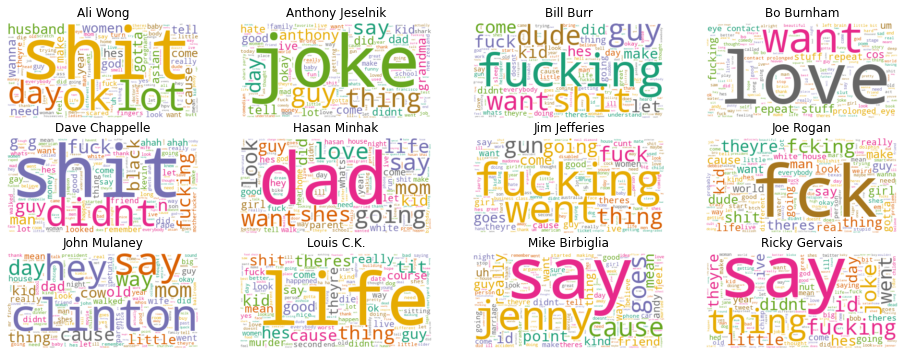

In [24]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=[16,6]

full_names=['Ali Wong','Anthony Jeselnik','Bill Burr','Bo Burnham','Dave Chappelle','Hasan Minhak','Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']


# Create subplots for each comedian

for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])

    plt.subplot(3,4,index+1)
    plt.imshow(wc,interpolation ="bilinear")
    plt.axis("off")
    plt.title(full_names[index])

plt.show()

#### You observations
1. A lot of comedians use the s-word
2. Many comedians use the f-word quite frequently

### Assignment 2:
#### Find the number of unique words that each comedian uses.

In [25]:
# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list=[]
for comedian in data.columns:
    uniques=data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names,unique_list)),columns=['comedian','unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort 

,comedian,unique_words
1,Anthony Jeselnik,1012
9,Louis C.K.,1128
3,Bo Burnham,1299
6,Jim Jefferies,1336
0,Ali Wong,1371
4,Dave Chappelle,1411
8,John Mulaney,1426
7,Joe Rogan,1463
10,Mike Birbiglia,1517
5,Hasan Minhak,1575


In [26]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list=[]
for comedian in data.columns:
    totals=sum(data[comedian])
    total_list.append(totals)

# Comedy special run times from IMDB in minutes
run_times=[60,59,80,60,67,73,77,63,62,58,76,79]
# add some columns to our dataframe: 'total_words', 'run_times' and 'words_per_minute'
data_words['total_words']=total_list
data_words['run_times']=run_times
data_words['words_per_minute']=data_words['total_words']/data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort=data_words.sort_values(by='words_per_minute')
data_wpm_sort


,comedian,unique_words,total_words,run_times,words_per_minute
1,Anthony Jeselnik,1012,2953,59,50.050847
3,Bo Burnham,1299,3207,60,53.450000
0,Ali Wong,1371,3325,60,55.416667
9,Louis C.K.,1128,3374,58,58.172414
4,Dave Chappelle,1411,4107,67,61.298507
6,Jim Jefferies,1336,4806,77,62.415584
10,Mike Birbiglia,1517,4784,76,62.947368
11,Ricky Gervais,1671,5045,79,63.860759
8,John Mulaney,1426,4061,62,65.500000
5,Hasan Minhak,1575,4795,73,65.684932


[ 0  1  2  3  4  5  6  7  8  9 10 11]


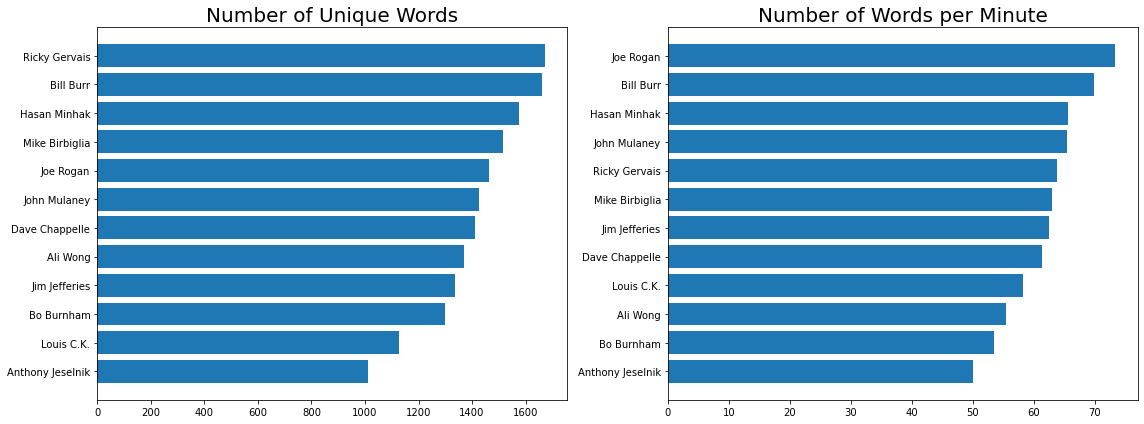

In [27]:
# plot our findings
import numpy as np

y_pos=np.arange(len(data_words))
print(y_pos)

plt.subplot(1,2,1)
plt.barh(y_pos,data_unique_sort.unique_words,align='center')
plt.yticks(y_pos,data_unique_sort.comedian)
plt.title('Number of Unique Words',fontsize=20)

plt.subplot(1,2,2)
plt.barh(y_pos,data_wpm_sort.words_per_minute,align='center')
plt.yticks(y_pos,data_wpm_sort.comedian)
plt.title('Number of Words per Minute',fontsize=20)

plt.tight_layout()
plt.show()

#### Write your findings. For example:
* **Vocabulary**
   * Ricky Gervais (British comedy) and Bill Burr (podcast host)  have a big pack of vocabulary at their disposal.
   * Louis C.K. (self-depricating comedy) and Anthony Jeselnik (dark humor) have a smaller vocabulary.
* **Talking Speed**
   * Joe Rogan (blue comedy) and Bill Burr (podcast host) talk fast.
   * Bo Burnham (musical comedy) and Anthony Jeselnik (dark humor) talk slow.
   


### Assignment 3: 
#### Check the profanity by analysing the common bad words, like `fucking`, `fuck`, `shit` etc.

In [28]:
# take a look at the most common words.
Counter(words).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('got', 10),
 ('time', 9),
 ('gonna', 8),
 ('think', 8),
 ('oh', 7),
 ('yeah', 7),
 ('said', 7),
 ('cause', 6),
 ('hes', 6),
 ('say', 6),
 ('going', 6),
 ('shit', 5),
 ('day', 5),
 ('really', 5),
 ('thing', 5),
 ('good', 5),
 ('fucking', 5),
 ('want', 5),
 ('didnt', 5),
 ('theyre', 5),
 ('theres', 5),
 ('did', 4),
 ('fuck', 4),
 ('guys', 3),
 ('ive', 3),
 ('little', 3),
 ('man', 3),
 ('life', 3),
 ('went', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('school', 2),
 ('guy', 2),
 ('make', 2),
 ('come', 2),
 ('love', 2),
 ('dad', 2),
 ('mom', 2),
 ('hey', 2),
 ('white', 2),
 ('goes', 2),
 ('kids', 2),
 ('real', 2),
 ('old', 2),
 ('id', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('need', 1),
 ('god', 1),
 ('work', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('jokes', 1),
 ('okay', 1),
 ('baby', 1),
 ('d

In [29]:
# isolate just these bad words
print(data.transpose()['shit'])
data_bad_words=data.transpose()[['fucking','fuck','shit']]
print(data.transpose()[['fucking','fuck','shit']])
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck , data_bad_words.shit],axis=1)
data_profanity.columns =['f_word','s_word']
data_profanity

ali        34
anthony     9
bill       64
bo          6
dave       46
hasan      15
jim        20
joe        40
john        6
louis      25
mike        0
ricky       6
Name: shit, dtype: int64
         fucking  fuck  shit
ali            5    11    34
anthony        6     9     9
bill          71    36    64
bo            23    15     6
dave          32    33    46
hasan          8    16    15
jim           78    37    20
joe            0     0    40
john           2     2     6
louis          6    15    25
mike           0     0     0
ricky         47    13     6


,f_word,s_word
ali,16,34
anthony,15,9
bill,107,64
bo,38,6
dave,65,46
hasan,24,15
jim,115,20
joe,0,40
john,4,6
louis,21,25


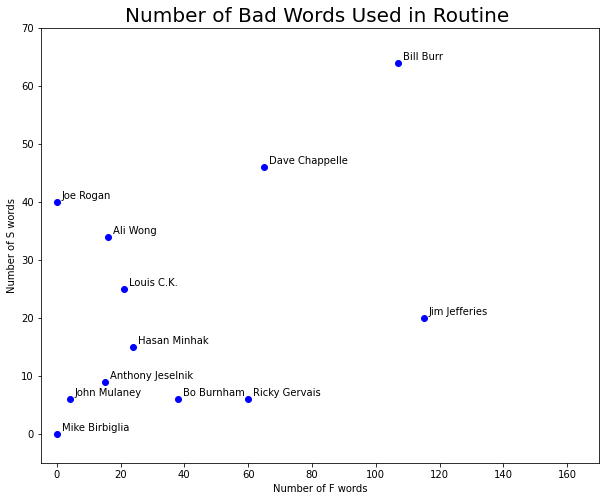

In [30]:
# create a scatter plot of your findings
plt.rcParams['figure.figsize']=[10,8]

for i , comedian in enumerate(data_profanity.index):
    x=data_profanity.f_word.loc[comedian]
    y=data_profanity.s_word.loc[comedian]
    plt.scatter(x,y,color='blue')
    plt.text(x+1.5,y+0.5,full_names[i],fontsize=10)
    plt.xlim(-5,170)
    plt.ylim(-5,70)

plt.title('Number of Bad Words Used in Routine ',fontsize=20)
plt.xlabel('Number of F words',fontsize=10)
plt.ylabel('Number of S words',fontsize=10)

plt.show()

### Write your findings. 
#### For example:
* **Averaging 2 F-Bombs Per Minute!** - The instructor doesn't like too much profanity, especially the f-word, which is probably she has never heard of Bill Bur, Joe Rogan and Jim Jefferies who use it quite often.
* **Clean Humor** - It looks like profanity might be a good predictor of the type of comedy the instructor likes. Besides Ali Wong, her two other favuorite comedians in the group are John Mulaney and Mike Birbiglia who don't use the f-word at all in their standups.

### Assignment 4:(optional)
What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.

In [31]:
data_good_words=data.transpose()[['wife','husband']]
# print(data_good_words)
data_good = pd.concat([data_good_words.wife, data_good_words.husband], axis=1)
data_good.columns =['wife','husband']
data_good


,wife,husband
ali,0,20
anthony,0,1
bill,9,0
bo,0,0
dave,9,1
hasan,0,0
jim,3,0
joe,1,1
john,18,0
louis,0,0


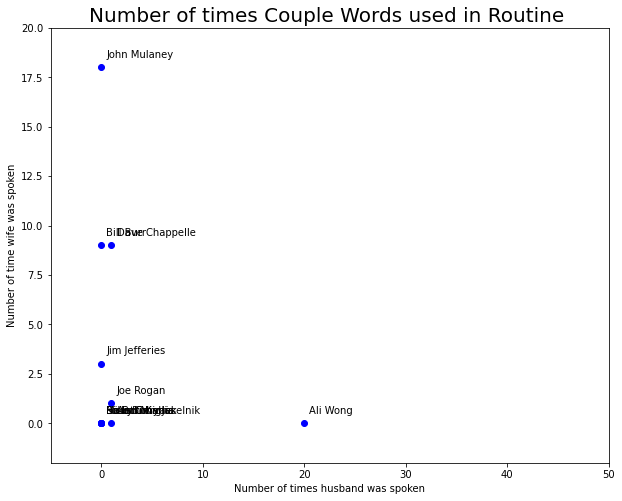

In [32]:
plt.rcParams['figure.figsize']=[10,8]

for i , comedian in enumerate(data_profanity.index):
    x=data_good_words.husband.loc[comedian]
    y=data_good_words.wife.loc[comedian]
    plt.scatter(x,y,color='blue')
    plt.text(x+0.5,y+0.5,full_names[i],fontsize=10)
    plt.xlim(-5,50)
    plt.ylim(-2,20)

plt.title('Number of times Couple Words used in Routine ',fontsize=20)
plt.xlabel('Number of times husband was spoken',fontsize=10)
plt.ylabel('Number of time wife was spoken',fontsize=10)

plt.show()


### Write your findings. 
Ali Wong makes extensive use of the word Husband to create humour while John Mulaney, Bill Dower and Dave Chappelle bring the word Wife a lot in their stand-up delivery. 